<a href="https://colab.research.google.com/github/Surajpatra700/yolov8-object-detection/blob/main/yolov8_obj_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Nov 17 08:58:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

yolo mode=predict runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to runs/predict

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="https://media.roboflow.com/notebooks/examples/dog.jpeg"

/content
100% 6.23M/6.23M [00:00<00:00, 64.5MB/s]
Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 90.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 157.3ms
Speed: 14.0ms preprocess, 157.3ms inference, 21.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


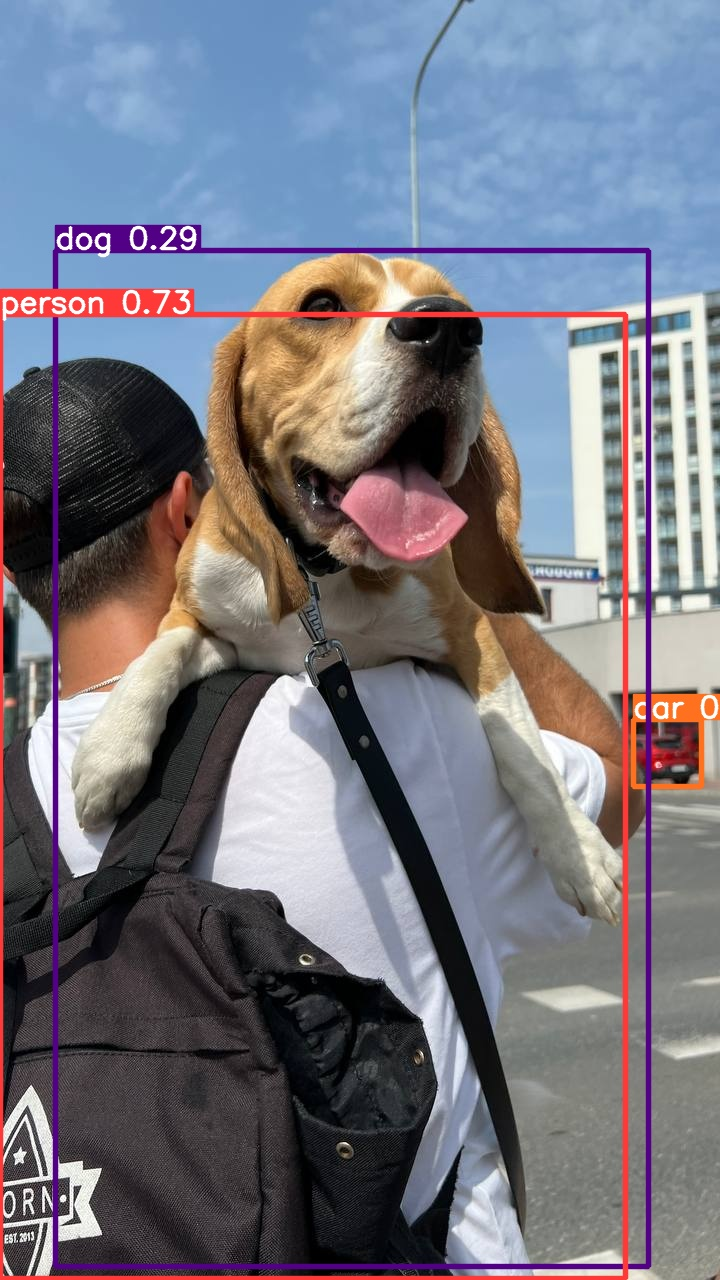

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=400)

In [ ]:
%cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OnBDYqnuKZJert3rJslX")
project = rf.workspace("football-tracking").project("hash-yards-intersection")
dataset = project.version(2).download("yolov8")


/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.211, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Hash-Yards-Intersection-2 in yolov8:: 100%|██████████| 5942/5942 [00:02<00:00, 2699.21it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/Hash-Yards-Intersection-2/data.yaml epochs=20 imgsz=800

/content
Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Hash-Yards-Intersection-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [ ]:
!dir {HOME}/runs/detect/train8/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1700214591.ad221105b883.17012.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1710.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1711.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1712.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


/content


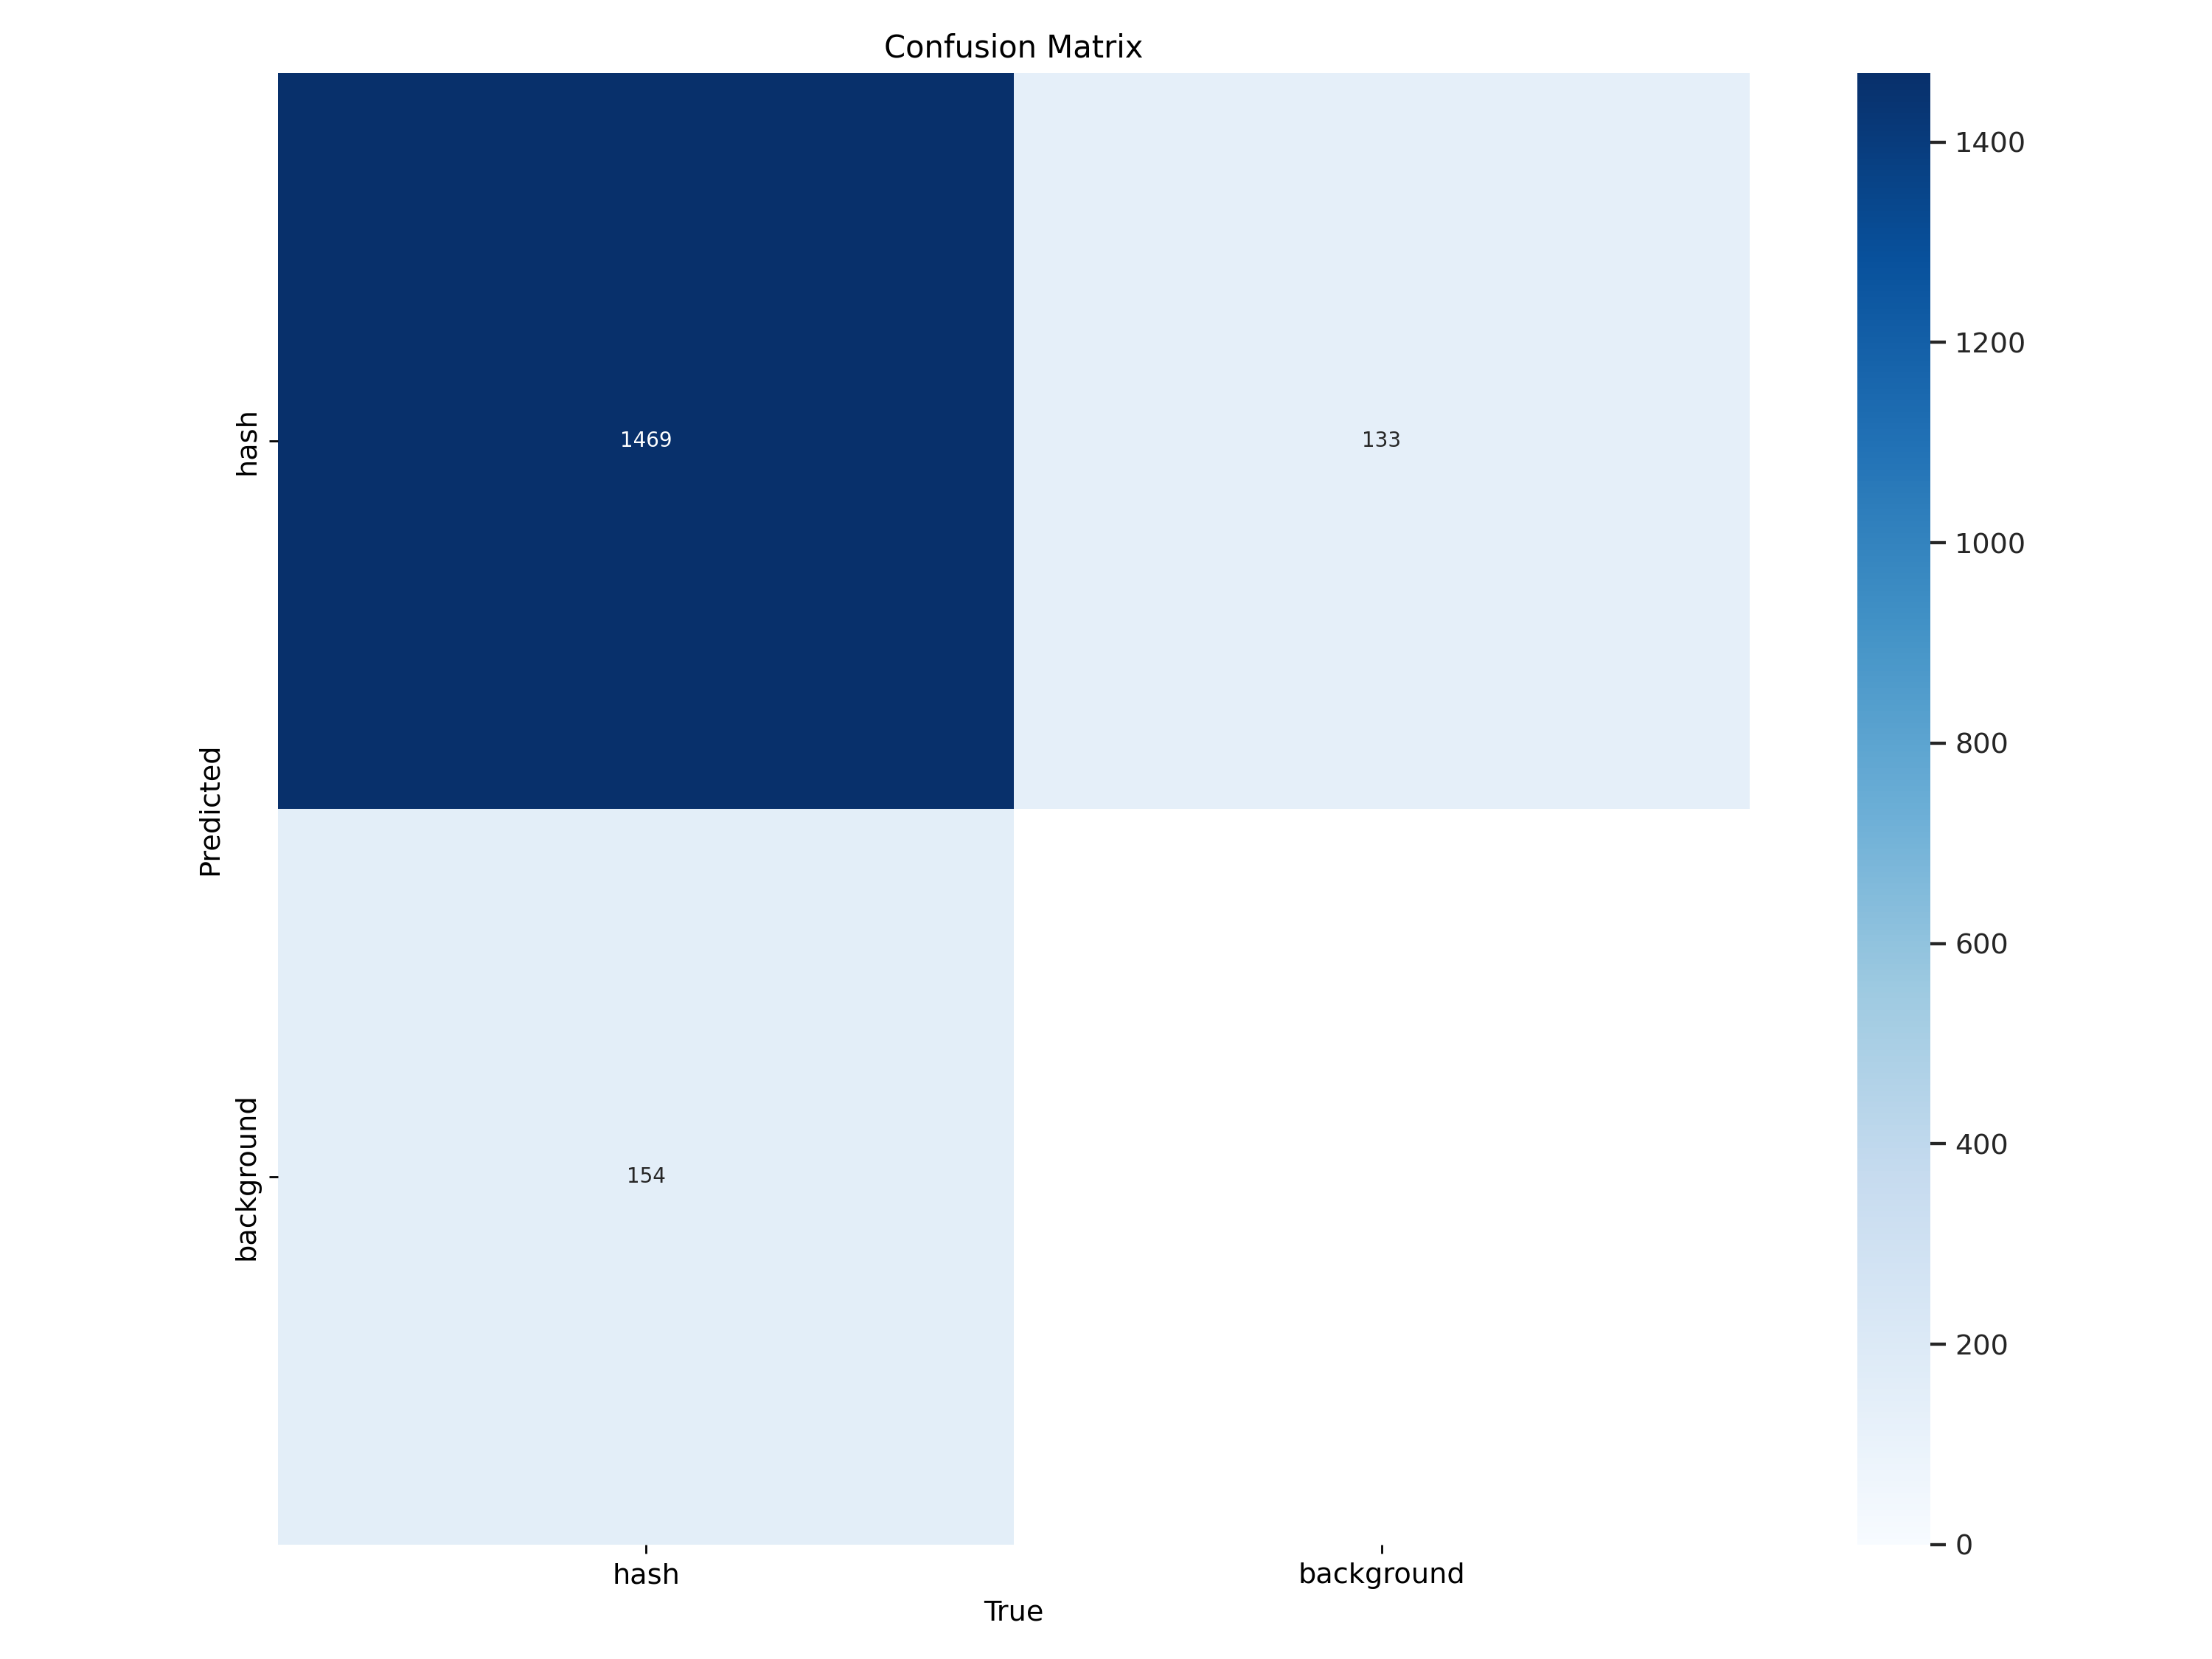

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content


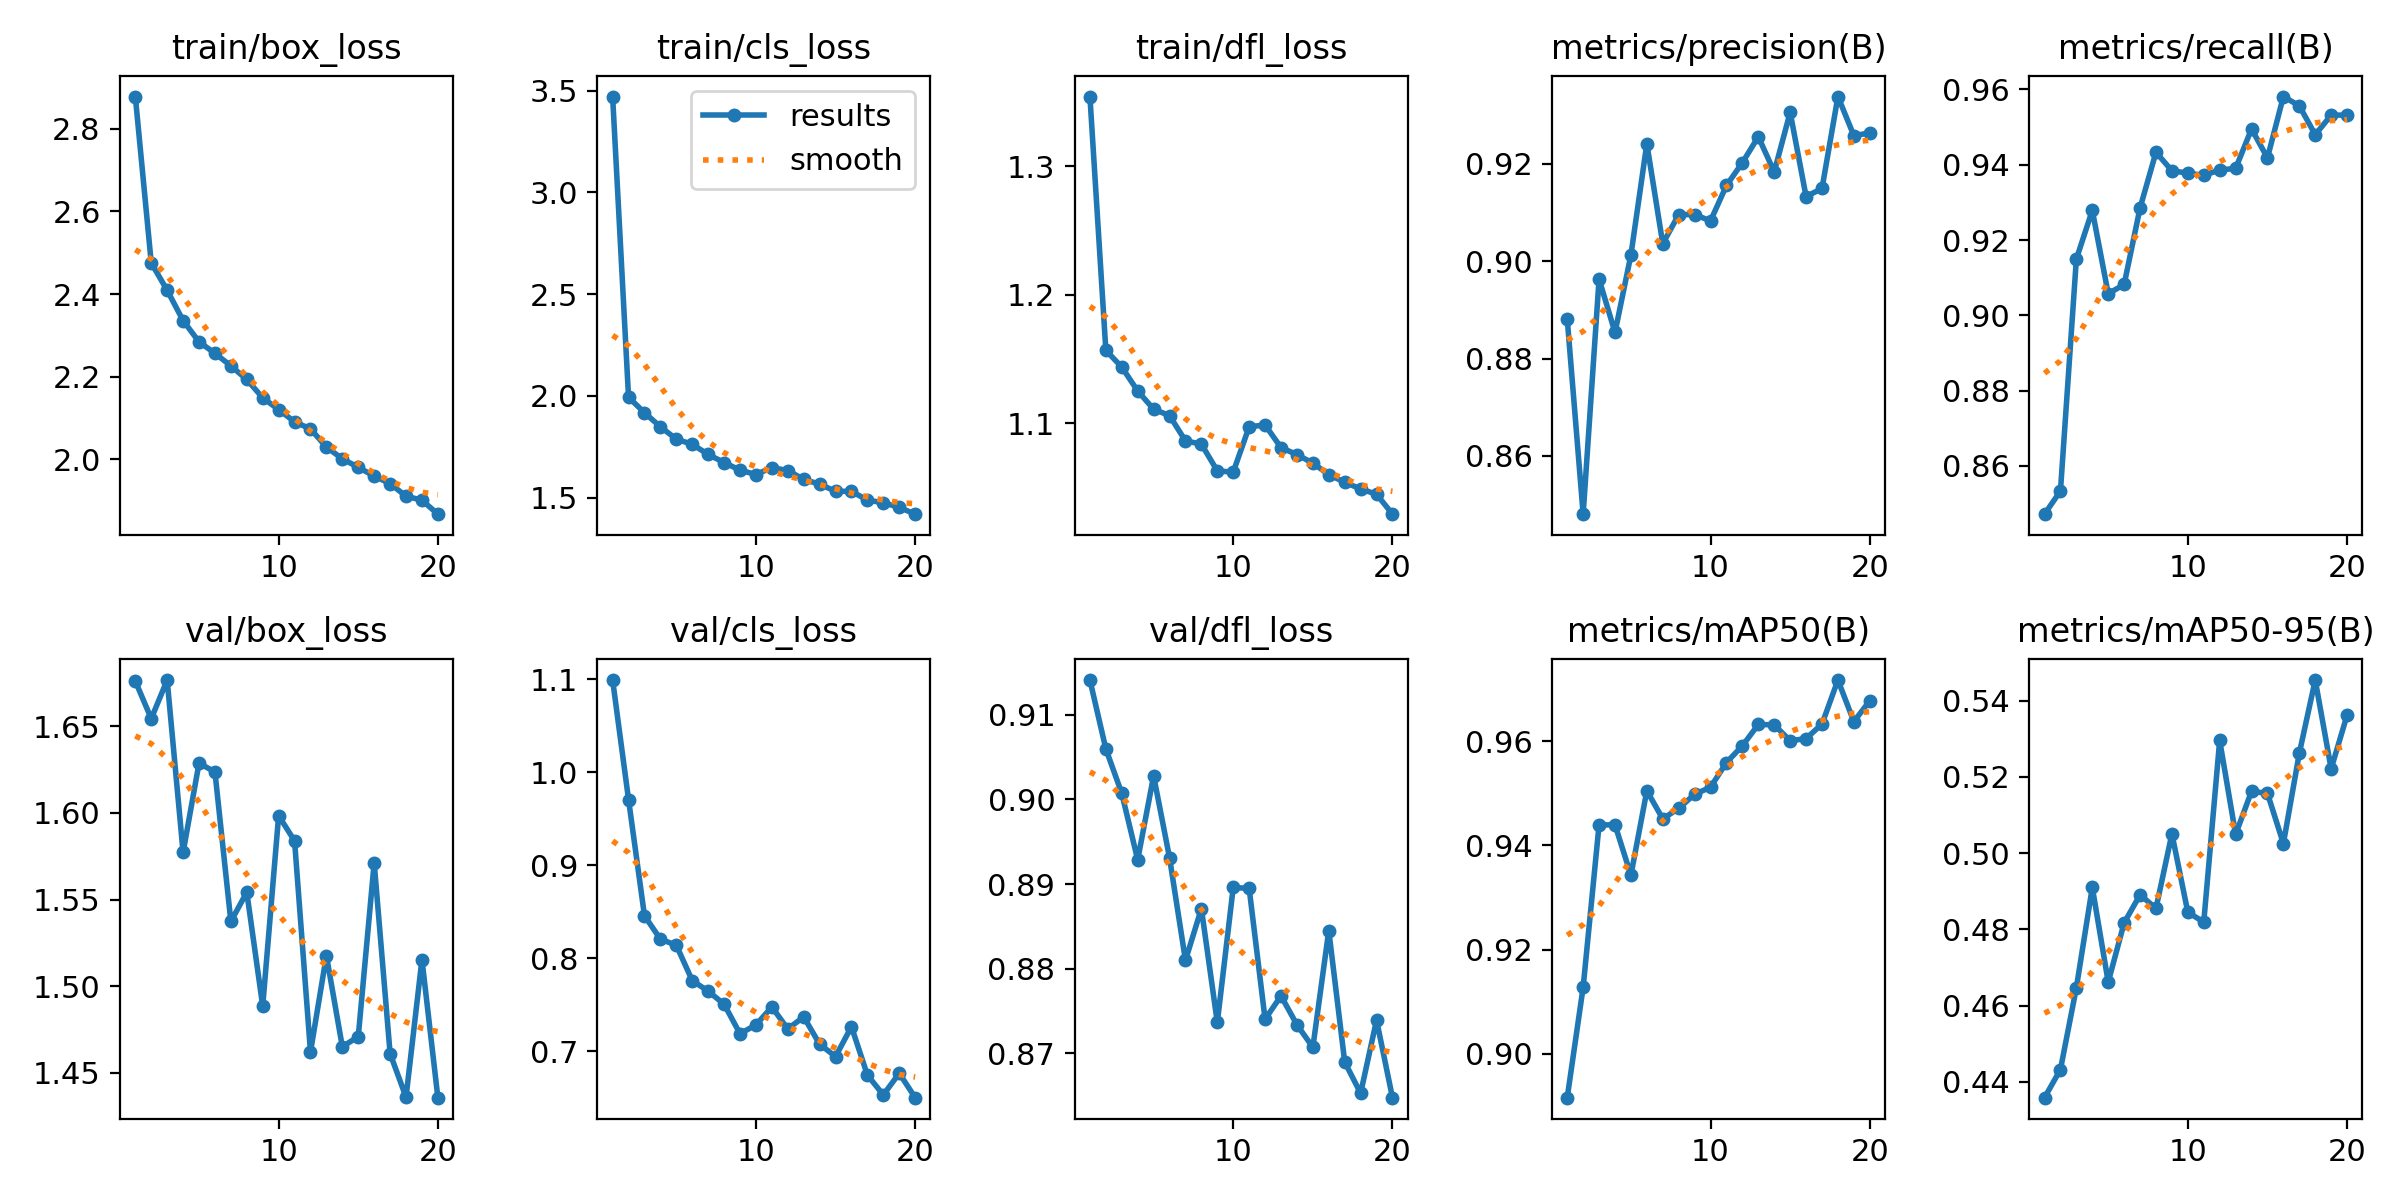

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/content


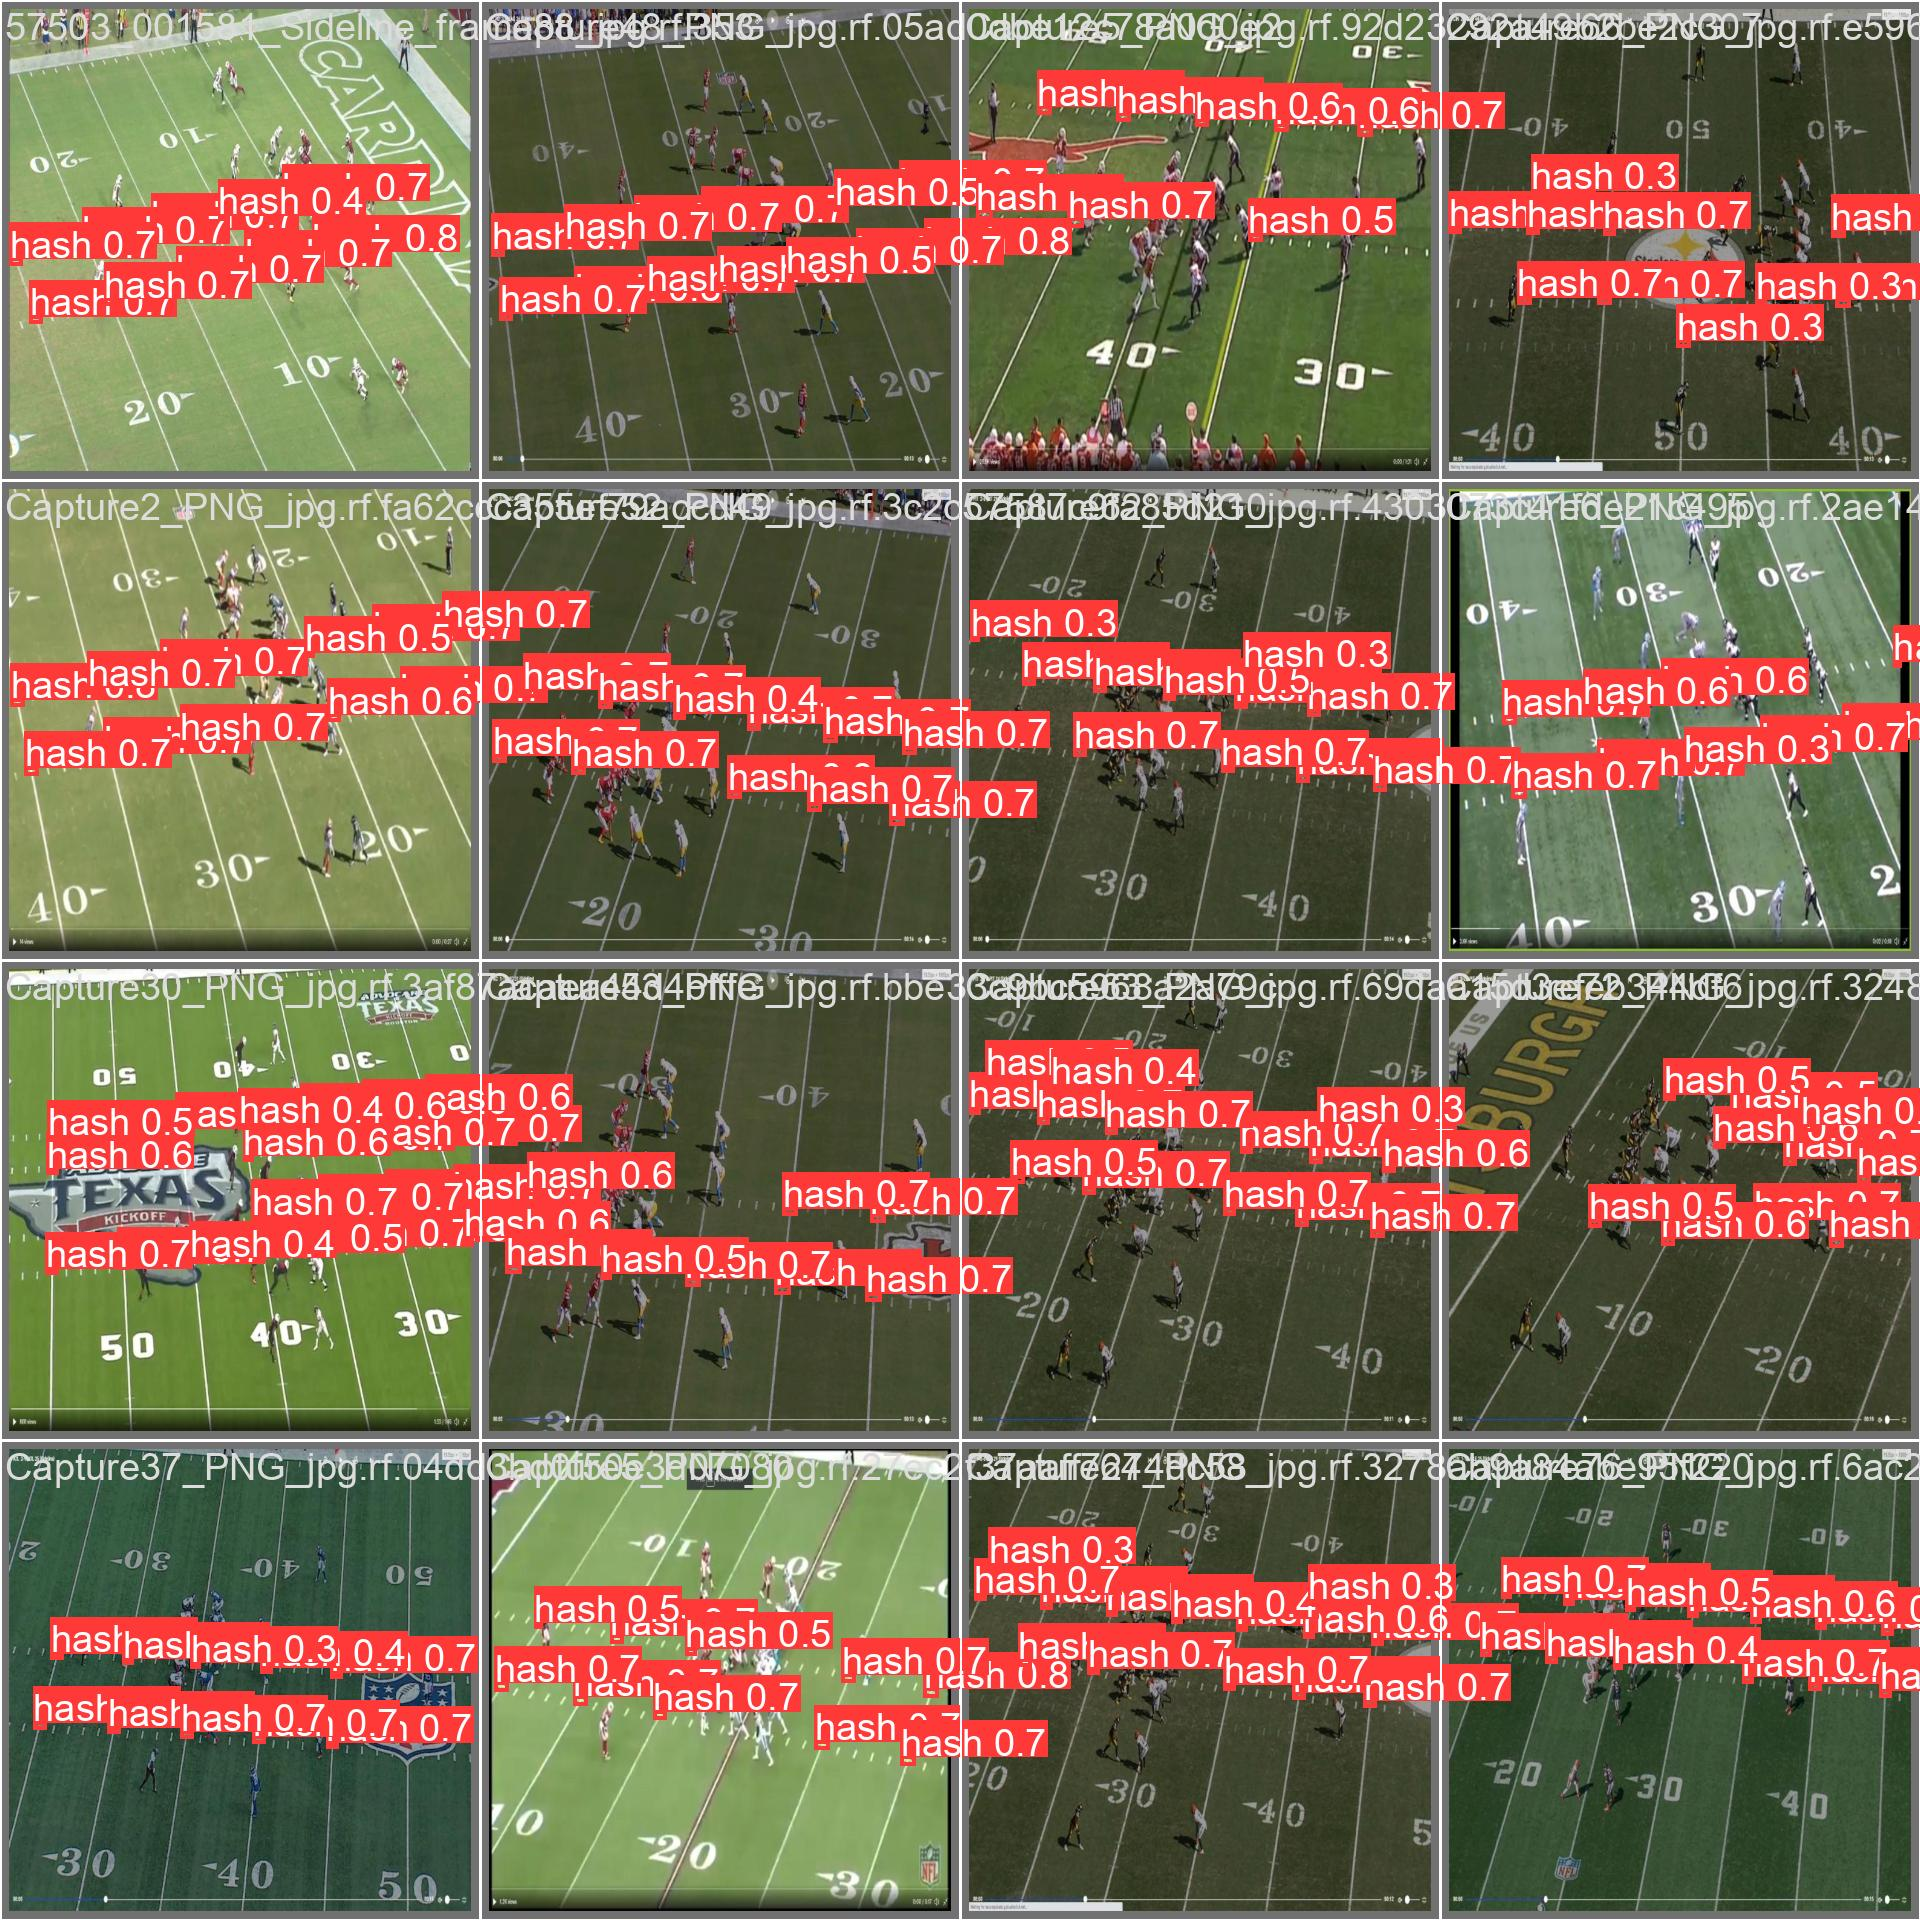

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Hash-Yards-Intersection-2/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100% 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:12<00:00,  1.27s/it]
                   all        158       1623      0.934      0.948      0.972       0.55
Speed: 11.3ms preprocess, 15.3ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/77 /content/Hash-Yards-Intersection-2/test/images/57515_001257_Sideline_frame22_jpg.rf.d00ffd9f93e345b5bcd385ded4e3ba3d.jpg: 800x800 7 hashs, 24.6ms
image 2/77 /content/Hash-Yards-Intersection-2/test/images/57526_001984_Sideline_frame50_jpg.rf.0b8a16fc44380d87044d0d5dae9a6c4c.jpg: 800x800 7 hashs, 24.6ms
image 3/77 /content/Hash-Yards-Intersection-2/test/images/57532_001633_Sideline_frame152_jpg.rf.272d57efb981ff6805fc3e20d76137f8.jpg: 800x800 15 hashs, 24.6ms
image 4/77 /content/Hash-Yards-Intersection-2/test/images/57532_003060_Sideline_frame8_jpg.rf.1c5ae86e925a3bb0b99f4eccb712ff6b.jpg: 800x800 9 hashs, 24.6ms
image 5/77 /content/Hash-Yards-Intersection-2/test/images/57534_003768_Sideline_frame98_jpg.rf.d335038a0a13adfa67c0d899f12d0773.jpg: 800x800 15 hashs, 24.6ms
image 6/77 /content/Hash-Yards-Int

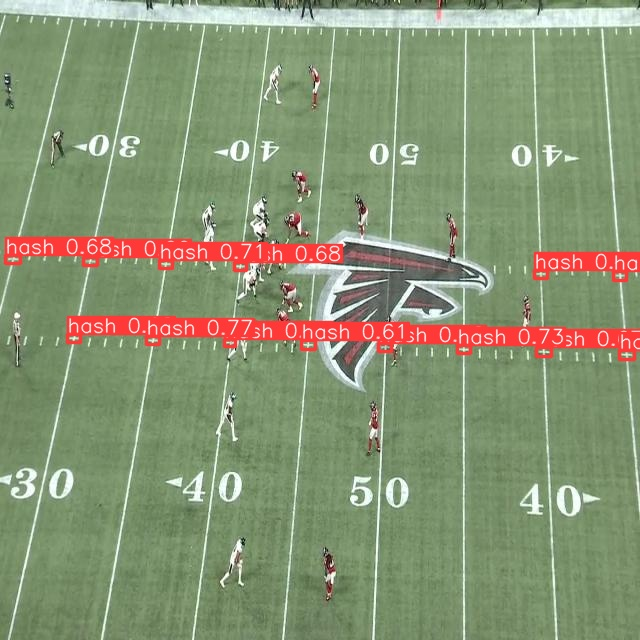

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:1]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
# !yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source= #path to your video with .mp4 extension

Deploying our model

In [ ]:
!pip install ultralytics==8.0.196
project.version(dataset.version).deploy(model_type='yolov8', model_path=f'{HOME}/runs/detect/train8/')

Dependency ultralytics==8.0.196 is required but found version=8.0.211, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/football-tracking/hash-yards-intersection/2/uploadModel?api_key=OnBDYqnuKZJert3rJslX&modelType=yolov8&nocache=true
